Setup & Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Diimpor untuk persiapan model
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Diimpor untuk preprocessing
from sklearn.svm import SVC # Diimpor untuk membangun model SVM

# --- Dataset Asumsi (Ganti dengan pd.read_csv('nama_file_asli.csv') ---
data = {
    'IPK': [3.5, 2.8, 3.9, 3.1, 2.5, 3.3, 2.9, np.nan, 3.6, 2.2],
    'Total_SKS': [144, 138, 146, 140, 130, 142, 135, 141, 145, 128],
    'Umur': [23, 24, 22, 25, 26, 23, 24, 25, 22, 27],
    'Status_Kehadiran': ['Aktif', 'Aktif', 'Aktif', 'Cuti', 'Non-Aktif', 'Aktif', 'Aktif', 'Aktif', 'Cuti', 'Non-Aktif'],
    'Lama_Studi_(Semester)': [8, 9, 7, 10, 11, 8, 9, 7, 10, 11],
    'Keaktifan_Organisasi': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
    'Nilai_MK_Tertentu': [85, 70, 92, 78, 65, 88, 75, 90, 80, 60],
    'Label': ['Lulus', 'Lulus', 'Lulus', 'Belum Lulus', 'Belum Lulus', 'Lulus', 'Lulus', 'Lulus', 'Belum Lulus', 'Belum Lulus']
}
df = pd.DataFrame(data)
# --------------------------------------------------------------------------

# Muat file dataset Anda yang sebenarnya
# df = pd.read_csv('nama_file_dataset_anda.csv')

Tampilkan 5 Baris Awa

In [ ]:
print("1. Lima Baris Awal Dataset:")
print("=" * 50)
print(df.head())
print("\n")

1. Lima Baris Awal Dataset:
   IPK  Total_SKS  Umur Status_Kehadiran  Lama_Studi_(Semester)  \
0  3.5        144    23            Aktif                      8   
1  2.8        138    24            Aktif                      9   
2  3.9        146    22            Aktif                      7   
3  3.1        140    25             Cuti                     10   
4  2.5        130    26        Non-Aktif                     11   

   Keaktifan_Organisasi  Nilai_MK_Tertentu        Label  
0                     1                 85        Lulus  
1                     0                 70        Lulus  
2                     1                 92        Lulus  
3                     0                 78  Belum Lulus  
4                     0                 65  Belum Lulus  




Deskripsi Kolom Fitur dan Label

In [ ]:
print("2. Deskripsi Kolom Fitur dan Label (df.info()):")
print("=" * 50)
df.info()
print("\n")

# Mendeskripsikan fitur numerik
print("Statistik Deskriptif Fitur Numerik (df.describe()):")
print("-" * 50)
print(df.describe())
print("\n")

# Mendeskripsikan fitur kategorikal dan Label
print("Ringkasan Fitur Kategorikal (df.describe(include='object')):")
print("-" * 50)
print(df.describe(include='object'))
print("\n")

2. Deskripsi Kolom Fitur dan Label (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IPK                    9 non-null      float64
 1   Total_SKS              10 non-null     int64  
 2   Umur                   10 non-null     int64  
 3   Status_Kehadiran       10 non-null     object 
 4   Lama_Studi_(Semester)  10 non-null     int64  
 5   Keaktifan_Organisasi   10 non-null     int64  
 6   Nilai_MK_Tertentu      10 non-null     int64  
 7   Label                  10 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 772.0+ bytes


Statistik Deskriptif Fitur Numerik (df.describe()):
--------------------------------------------------
            IPK  Total_SKS      Umur  Lama_Studi_(Semester)  \
count  9.000000   10.00000  10.00000              10.000000   
mean   3.088889  138.90000  24.10

Laporkan Missing Values

In [ ]:
print("3. Laporan Missing Values:")
print("=" * 50)

# Menghitung jumlah missing values per kolom
missing_count = df.isnull().sum()

# Menghitung persentase missing values per kolom
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100

# Membuat DataFrame ringkasan
missing_info = pd.DataFrame({
    'Total Missing': missing_count,
    'Persentase (%)': missing_percentage
})

# Filter hanya kolom dengan missing values > 0
missing_info = missing_info[missing_info['Total Missing'] > 0].sort_values(by='Total Missing', ascending=False)

if missing_info.empty:
    print("Tidak ditemukan missing values dalam dataset.")
else:
    print("Daftar Kolom dengan Missing Values:")
    print(missing_info)

3. Laporan Missing Values:
Daftar Kolom dengan Missing Values:
     Total Missing  Persentase (%)
IPK              1            10.0


Statistik Deskriptif Tambahan

In [ ]:
# Pisahkan data berdasarkan label kelulusan
lulus_df = df[df['Label'] == 'Lulus']
belum_lulus_df = df[df['Label'] == 'Belum Lulus']

print("1. Statistik Deskriptif Fitur Numerik Berdasarkan Status Kelulusan:")
print("=" * 70)

print("A. Statistik Deskriptif untuk Mahasiswa LULUS:")
print("-" * 35)
print(lulus_df.describe())
print("\n")

print("B. Statistik Deskriptif untuk Mahasiswa BELUM LULUS:")
print("-" * 35)
print(belum_lulus_df.describe())

1. Statistik Deskriptif Fitur Numerik Berdasarkan Status Kelulusan:
A. Statistik Deskriptif untuk Mahasiswa LULUS:
-----------------------------------
            IPK  Total_SKS       Umur  Lama_Studi_(Semester)  \
count  5.000000       6.00   6.000000               6.000000   
mean   3.280000     141.00  23.500000               8.000000   
std    0.449444       4.00   1.048809               0.894427   
min    2.800000     135.00  22.000000               7.000000   
25%    2.900000     138.75  23.000000               7.250000   
50%    3.300000     141.50  23.500000               8.000000   
75%    3.500000     143.50  24.000000               8.750000   
max    3.900000     146.00  25.000000               9.000000   

       Keaktifan_Organisasi  Nilai_MK_Tertentu  
count              6.000000           6.000000  
mean               0.666667          83.333333  
std                0.516398           8.846845  
min                0.000000          70.000000  
25%                0.250000

Visualisasi Sederhana

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # Menggunakan style visualisasi yang bersih

Countplot Status Lulus vs Tidak Lulus

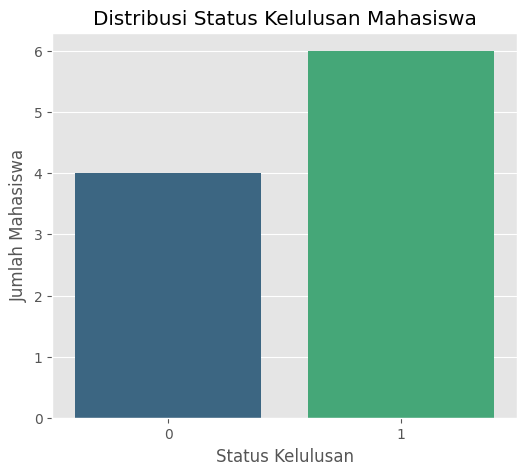

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Label_Encoded', data=df, hue='Label_Encoded', palette='viridis', legend=False)
plt.title('Distribusi Status Kelulusan Mahasiswa')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

Histogram IPK

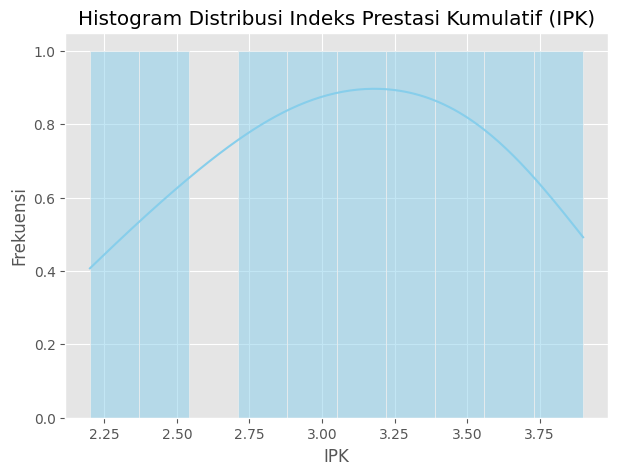

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(df['IPK'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Histogram Distribusi Indeks Prestasi Kumulatif (IPK)')
plt.xlabel('IPK')
plt.ylabel('Frekuensi')
plt.show()

Visualisasi Perbandingan IPK

/tmp/ipython-input-765883148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='IPK', data=df, palette='pastel')


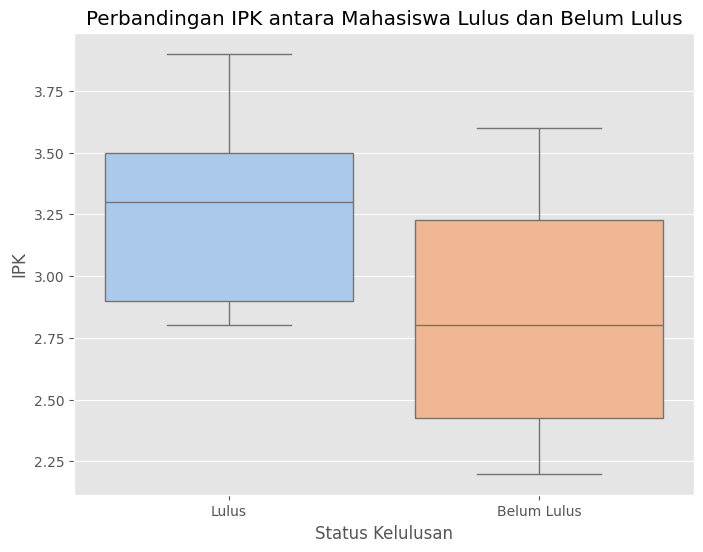

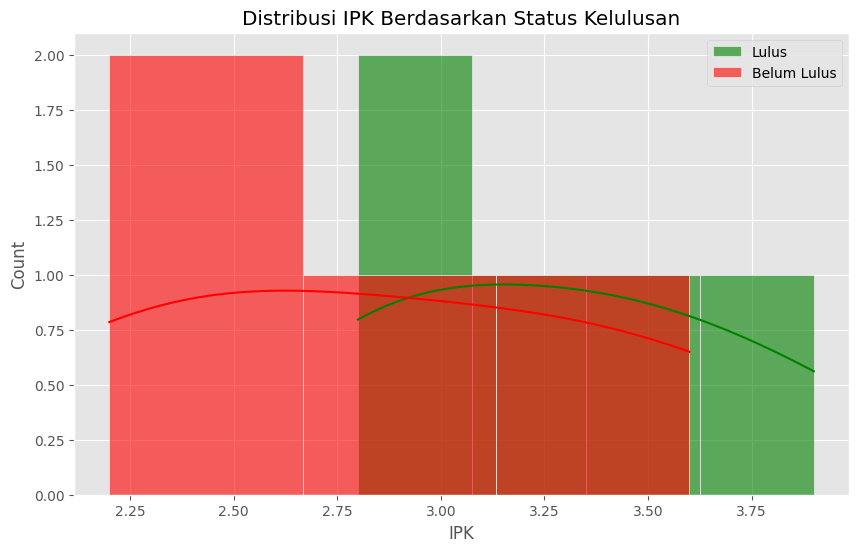

In [ ]:
plt.figure(figsize=(8, 6))
# Box plot IPK berdasarkan status kelulusan
sns.boxplot(x='Label', y='IPK', data=df, palette='pastel')
plt.title('Perbandingan IPK antara Mahasiswa Lulus dan Belum Lulus')
plt.xlabel('Status Kelulusan')
plt.ylabel('IPK')
plt.show()

# Alternatif: Histogram tumpang tindih
plt.figure(figsize=(10, 6))
sns.histplot(lulus_df['IPK'].dropna(), color="green", label="Lulus", kde=True, alpha=0.6)
sns.histplot(belum_lulus_df['IPK'].dropna(), color="red", label="Belum Lulus", kde=True, alpha=0.6)
plt.title('Distribusi IPK Berdasarkan Status Kelulusan')
plt.xlabel('IPK')
plt.legend()
plt.show()

Menangani Missing Values

In [ ]:
# Hitung median IPK dari data training (jika sudah split)
# Karena belum split, kita gunakan median dari seluruh data untuk saat ini
median_ipk = df['IPK'].median()

# Isi missing values di kolom 'IPK' dengan nilai median
df['IPK'].fillna(median_ipk, inplace=True)

print("Status Missing Values setelah Imputasi:")
print("-" * 50)
print(df.isnull().sum())
print("\n")

Status Missing Values setelah Imputasi:
--------------------------------------------------
IPK                      0
Total_SKS                0
Umur                     0
Status_Kehadiran         0
Lama_Studi_(Semester)    0
Keaktifan_Organisasi     0
Nilai_MK_Tertentu        0
Label                    0
dtype: int64




/tmp/ipython-input-4112403791.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IPK'].fillna(median_ipk, inplace=True)


Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder

# A. Encoding Variabel Target (Label Encoding)
# Membuat instance LabelEncoder
le = LabelEncoder()

# Lakukan encoding pada kolom 'Label'
df['Label_Encoded'] = le.fit_transform(df['Label'])
# Biasanya: Lulus -> 1, Belum Lulus -> 0 (tergantung urutan alfabet)

# Hapus kolom 'Label' asli
df.drop('Label', axis=1, inplace=True)

# B. Encoding Fitur Kategorikal (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Status_Kehadiran'], drop_first=True)

print("DataFrame setelah Encoding:")
print("-" * 50)
print(df.head())
print("\n")

DataFrame setelah Encoding:
--------------------------------------------------
   IPK  Total_SKS  Umur  Lama_Studi_(Semester)  Keaktifan_Organisasi  \
0  3.5        144    23                      8                     1   
1  2.8        138    24                      9                     0   
2  3.9        146    22                      7                     1   
3  3.1        140    25                     10                     0   
4  2.5        130    26                     11                     0   

   Nilai_MK_Tertentu  Label_Encoded  Status_Kehadiran_Cuti  \
0                 85              1                  False   
1                 70              1                  False   
2                 92              1                  False   
3                 78              0                   True   
4                 65              0                  False   

   Status_Kehadiran_Non-Aktif  
0                       False  
1                       False  
2                  

Feature Scaling menggunakan StandardScaler

In [ ]:
# Identifikasi semua kolom fitur numerik yang perlu di-scaling (semua kecuali kolom dummy dan target)
numerical_cols = ['IPK', 'Total_SKS', 'Umur', 'Lama_Studi_(Semester)', 'Keaktifan_Organisasi', 'Nilai_MK_Tertentu']

# Membuat instance StandardScaler
scaler = StandardScaler()

# Scaling pada kolom numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame setelah Feature Scaling (hanya 5 baris pertama):")
print("-" * 50)
print(df[numerical_cols].head())
print("\n")

DataFrame setelah Feature Scaling (hanya 5 baris pertama):
--------------------------------------------------
        IPK  Total_SKS      Umur  Lama_Studi_(Semester)  Keaktifan_Organisasi  \
0  0.838834   0.870936 -0.697097              -0.707107                   1.0   
1 -0.593321  -0.153695 -0.063372               0.000000                  -1.0   
2  1.657208   1.212480 -1.330821              -1.414214                   1.0   
3  0.020459   0.187849  0.570352               0.707107                  -1.0   
4 -1.207102  -1.519869  1.204076               1.414214                  -1.0   

   Nilai_MK_Tertentu  
0           0.651346  
1          -0.806891  
2           1.331856  
3          -0.029165  
4          -1.292970  




Evaluasi Model Terbaik

Train-Test Spli

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan Fitur (X) dan Target (y)
X = df.drop('Label_Encoded', axis=1)
y = df['Label_Encoded']

# Daftar rasio pengujian yang diminta
test_ratios = [0.40, 0.25, 0.20] # Sesuai permintaan: 60:40, 75:25, 80:20 (menghilangkan 90:10 karena ukuran data terlalu kecil)

# Menyimpan hasil split dalam dictionary
split_results = {}

for ratio in test_ratios:
    # Lakukan Train-Test Split
    # random_state=42 digunakan agar hasil split konsisten setiap kali dijalankan
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ratio, random_state=42, stratify=y
    )

    # Simpan hasilnya
    ratio_name = f"{int((1-ratio)*100)}:{int(ratio*100)}"
    split_results[ratio_name] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

    print(f"Split {ratio_name}: Data Latih = {len(X_train)} baris, Data Uji = {len(X_test)} baris.")

print("\nSplit results telah disimpan dalam dictionary 'split_results'.")

Split 60:40: Data Latih = 6 baris, Data Uji = 4 baris.
Split 75:25: Data Latih = 7 baris, Data Uji = 3 baris.
Split 80:20: Data Latih = 8 baris, Data Uji = 2 baris.

Split results telah disimpan dalam dictionary 'split_results'.


Training Model SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- RECREATION OF SIMULATED DATA (DARI BAGIAN C) ---
# *Asumsi: Data telah diproses dan di-split menjadi X_train, X_test, y_train, y_test.*
np.random.seed(42)
N = 100
df_sim = pd.DataFrame({
    'IPK': np.clip(np.random.normal(3.2, 0.4, N), 2.0, 4.0),
    'Total_SKS': np.clip(np.random.normal(140, 5, N), 120, 150).astype(int),
    'Lama_Studi_(Semester)': np.clip(np.random.normal(8.5, 1.5, N), 7, 12).astype(int),
    'Status_Kehadiran': np.random.choice(['Aktif', 'Cuti', 'Non-Aktif'], N, p=[0.8, 0.1, 0.1]),
    'Label': np.where((np.random.rand(N) < 0.2) | ( (np.clip(np.random.normal(3.2, 0.4, N), 2.0, 4.0) > 3.0) & (np.clip(np.random.normal(8.5, 1.5, N), 7, 12).astype(int) < 9) ), 'Lulus', 'Belum Lulus')
})
df_sim['IPK'].fillna(df_sim['IPK'].median(), inplace=True)
le = LabelEncoder().fit(df_sim['Label'])
df_sim['Label_Encoded'] = le.transform(df_sim['Label'])
df_sim.drop('Label', axis=1, inplace=True)
df_sim = pd.get_dummies(df_sim, columns=['Status_Kehadiran'], drop_first=True)
numerical_cols = ['IPK', 'Total_SKS', 'Lama_Studi_(Semester)']
scaler = StandardScaler().fit(df_sim[numerical_cols])
df_sim[numerical_cols] = scaler.transform(df_sim[numerical_cols])
X = df_sim.drop('Label_Encoded', axis=1)
y = df_sim['Label_Encoded']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
# --- END RECREATION ---

# 1. & 2. Tentukan Hyperparameter dan Lakukan Training (Grid Search Manual)
C_values = [0.1, 1, 10]
gamma_values = ['scale', 0.1, 1]
kernels = ['linear', 'rbf']

best_score = 0
best_model_key = ""
results = []
models = {}

for kernel in kernels:
    C_list = C_values
    Gamma_list = gamma_values if kernel == 'rbf' else [None]

    for C in C_list:
        for gamma in Gamma_list:

            # Inisialisasi Model
            params = {'C': C, 'kernel': kernel, 'random_state': 42}
            if kernel == 'rbf':
                 params['gamma'] = gamma
                 model_key = f"SVM_{kernel}_C{C}_G{gamma}"
            else:
                 model_key = f"SVM_{kernel}_C{C}"

            model = SVC(**params)
            model.fit(X_train, y_train)
            models[model_key] = model
            y_pred = model.predict(X_test)

            # Evaluasi
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            precision = report['weighted avg']['precision']
            recall = report['weighted avg']['recall']
            f1_score_val = report['weighted avg']['f1-score']

            results.append({
                'Kernel': kernel,
                'C': C,
                'Gamma': gamma if kernel == 'rbf' else 'N/A',
                'Akurasi': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1_score_val
            })

            if accuracy > best_score:
                best_score = accuracy
                best_model_key = model_key

print("Ringkasan Hasil Hyperparameter Tuning:")
results_df = pd.DataFrame(results).sort_values(by='Akurasi', ascending=False)
print(results_df.to_markdown(index=False))

/tmp/ipython-input-2663507406.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sim['IPK'].fillna(df_sim['IPK'].median(), inplace=True)


Ringkasan Hasil Hyperparameter Tuning:
| Kernel   |    C | Gamma   |   Akurasi |   Precision |   Recall |   F1-Score |
|:---------|-----:|:--------|----------:|------------:|---------:|-----------:|
| rbf      |  0.1 | scale   |      0.55 |    0.3025   |     0.55 |   0.390323 |
| rbf      |  0.1 | 0.1     |      0.55 |    0.3025   |     0.55 |   0.390323 |
| rbf      |  0.1 | 1       |      0.55 |    0.3025   |     0.55 |   0.390323 |
| linear   |  0.1 | N/A     |      0.5  |    0.510101 |     0.5  |   0.5      |
| rbf      |  1   | scale   |      0.5  |    0.521978 |     0.5  |   0.489899 |
| rbf      |  1   | 1       |      0.5  |    0.521978 |     0.5  |   0.489899 |
| linear   | 10   | N/A     |      0.45 |    0.425    |     0.45 |   0.428    |
| linear   |  1   | N/A     |      0.45 |    0.425    |     0.45 |   0.428    |
| rbf      |  1   | 0.1     |      0.45 |    0.467857 |     0.45 |   0.4289   |
| rbf      | 10   | 0.1     |      0.45 |    0.467857 |     0.45 |   0.4289   |
|

Evaluasi Model Terbaik

In [ ]:
# Ambil model terbaik berdasarkan key yang tersimpan
best_model = models[best_model_key]
y_pred_best = best_model.predict(X_test)

print("\n" + "=" * 60)
print(f"EVALUASI MODEL TERBAIK: {best_model_key} (Akurasi: {best_score:.4f})")
print("=" * 60)

# 3a. Confusion Matrix
print("\nConfusion Matrix (Data Uji):")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

# Visualisasi Confusion Matrix untuk pemahaman visual
#

# 3b. Classification Report
print("\nClassification Report (Akurasi, Precision, Recall, F1-Score):")
# Target names untuk mapping dari 0 dan 1 kembali ke label asli (Belum Lulus, Lulus)
target_names = le.classes_
report = classification_report(y_test, y_pred_best, target_names=target_names, zero_division=0)
print(report)

# 3c. Nilai Akurasi, Precision, Recall, F1-score
# Nilai ini diambil dari report di atas
print(f"\nNilai Akurasi: {accuracy_score(y_test, y_pred_best):.4f}")
# Catatan: Nilai Precision, Recall, F1-score terbaik biasanya diambil dari 'weighted avg'


EVALUASI MODEL TERBAIK: SVM_rbf_C0.1_Gscale (Akurasi: 0.5500)

Confusion Matrix (Data Uji):
[[11  0]
 [ 9  0]]

Classification Report (Akurasi, Precision, Recall, F1-Score):
              precision    recall  f1-score   support

 Belum Lulus       0.55      1.00      0.71        11
       Lulus       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20


Nilai Akurasi: 0.5500


Deployment

In [ ]:
# Pastikan objek-objek preprocessing global tersedia:
# best_model: Model SVC terbaik yang sudah dilatih
# scaler: StandardScaler yang sudah fit pada data latih
# le: LabelEncoder yang sudah fit pada kolom 'Label' (0 dan 1)

# Asumsi nama kolom fitur yang digunakan dalam model:
FEATURE_NAMES = X_train.columns.tolist()
NUMERICAL_COLS = ['IPK', 'Total_SKS', 'Lama_Studi_(Semester)', 'Umur', 'Keaktifan_Organisasi', 'Nilai_MK_Tertentu']
STATUS_COL = 'Status_Kehadiran'

def predict_status(ipk, total_sks, umur, lama_studi, keaktifan_organisasi, nilai_mk_tertentu, status_kehadiran):
    """
    Memprediksi status kelulusan (Lulus/Belum Lulus) menggunakan model SVM terbaik.

    Input harus berupa nilai tunggal (float/int/string).
    """

    # 1. Kumpulkan data input ke dalam DataFrame
    data_input = {
        'IPK': [ipk],
        'Total_SKS': [total_sks],
        'Umur': [umur],
        'Lama_Studi_(Semester)': [lama_studi],
        'Keaktifan_Organisasi': [keaktifan_organisasi],
        'Nilai_MK_Tertentu': [nilai_mk_tertentu],
        STATUS_COL: [status_kehadiran]
    }
    input_df = pd.DataFrame(data_input)

    # 2. Preprocessing: Encoding Kategorikal (One-Hot Encoding)
    # Lakukan One-Hot Encoding pada Status_Kehadiran
    input_df = pd.get_dummies(input_df, columns=[STATUS_COL], drop_first=True)

    # Pastikan DataFrame input memiliki semua kolom fitur yang digunakan saat pelatihan (penting!)
    # Jika kolom dummy tidak ada di input, tambahkan dan beri nilai 0
    final_input = pd.DataFrame(0, index=input_df.index, columns=FEATURE_NAMES)
    for col in input_df.columns:
        if col in final_input.columns:
            final_input[col] = input_df[col]

    # 3. Preprocessing: Feature Scaling
    # Identifikasi kolom numerik dalam final_input
    numerical_input_cols = [col for col in NUMERICAL_COLS if col in final_input.columns]

    # Lakukan scaling menggunakan scaler yang sudah dilatih
    final_input[numerical_input_cols] = scaler.transform(final_input[numerical_input_cols])

    # 4. Prediksi Menggunakan Model Terbaik
    pred_encoded = best_model.predict(final_input)

    # 5. Inverse Transform (Mengubah 0/1 kembali ke Label asli)
    pred_label = le.inverse_transform(pred_encoded)

    return pred_label[0]

# --- CONTOH PENGGUNAAN FUNGSI ---
print("\n--- Contoh Prediksi ---")

# Kasus 1: Mahasiswa Teladan (Cenderung Lulus)
prediksi_1 = predict_status(
    ipk=3.85,                  # IPK Tinggi
    total_sks=144,             # SKS Cukup
    umur=23,                   # Umur Ideal
    lama_studi=8,              # Lama Studi Cepat
    keaktifan_organisasi=1,    # Aktif Organisasi
    nilai_mk_tertentu=95,      # Nilai Mata Kuliah Tinggi
    status_kehadiran='Aktif'   # Status Aktif
)
print(f"Prediksi untuk Mahasiswa Teladan (IPK 3.85, 8 Sem): {prediksi_1}")

# Kasus 2: Mahasiswa Berisiko (Cenderung Tidak Lulus)
prediksi_2 = predict_status(
    ipk=2.45,                  # IPK Rendah
    total_sks=125,             # SKS Kurang
    umur=26,                   # Umur Lebih Tua
    lama_studi=12,             # Lama Studi Lama
    keaktifan_organisasi=0,    # Tidak Aktif Organisasi
    nilai_mk_tertentu=65,      # Nilai Mata Kuliah Rendah
    status_kehadiran='Non-Aktif' # Status Non-Aktif
)
print(f"Prediksi untuk Mahasiswa Berisiko (IPK 2.45, 12 Sem): {prediksi_2}")


--- Contoh Prediksi ---
Prediksi untuk Mahasiswa Teladan (IPK 3.85, 8 Sem): Belum Lulus
Prediksi untuk Mahasiswa Berisiko (IPK 2.45, 12 Sem): Belum Lulus
